In [386]:
import pandas as pd
import numpy as np
#Vizualizations library
import matplotlib.pyplot as plt
import seaborn as sns
#Machine Learning library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score
from math import sqrt


Collecting data & EDA

In [387]:
VG_df=pd.read_csv('vgsales.csv')
VG_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [388]:
VG_df.dtypes

Rank              int64
Name             object
Platform         object
Year             object
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [389]:
# to know if there are null values
VG_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [390]:
# delete rows that contain null values in the All feature
VG_df.isna().sum(axis=1).shape
VG_df.dropna(inplace=True)
VG_df.shape
VG_df.isna().sum(axis=0)

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [391]:
VG_nan = VG_df[VG_df.isna().any(axis=1)] 
VG_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          0 non-null      int64  
 1   Name          0 non-null      object 
 2   Platform      0 non-null      object 
 3   Year          0 non-null      object 
 4   Genre         0 non-null      object 
 5   Publisher     0 non-null      object 
 6   NA_Sales      0 non-null      float64
 7   EU_Sales      0 non-null      float64
 8   JP_Sales      0 non-null      float64
 9   Other_Sales   0 non-null      float64
 10  Global_Sales  0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 0.0+ bytes


In [392]:
#delete Rank column 
VG_df.drop('Rank', axis=1,inplace=True)
VG_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [393]:
## to know if there are duplicate

VG_df.duplicated().sum()

0

In [394]:
print("The highest selling type of video game in global\n")
Max_Global=VG_df.groupby('Genre').Global_Sales.max().sort_values(ascending=False)
print(Max_Global)

print("\nThe highest selling type of video game in another world\n")
Max_Other=VG_df.groupby('Genre').Other_Sales.max().sort_values(ascending=False)
Max_Other

The highest selling type of video game in global

Genre
Sports          82.74
Platform        40.24
Racing          35.82
Role-Playing    31.37
Puzzle          30.26
Misc            29.02
Shooter         28.31
Simulation      24.76
Action          21.40
Fighting        13.04
Adventure       11.18
Strategy         5.45
Name: Global_Sales, dtype: float64

The highest selling type of video game in another world



Genre
Action          10.57
Sports           8.46
Racing           7.53
Platform         2.90
Misc             2.85
Simulation       2.75
Shooter          2.52
Role-Playing     1.74
Fighting         1.41
Puzzle           1.18
Adventure        0.83
Strategy         0.59
Name: Other_Sales, dtype: float64

In [395]:
# the maximum of games based on Genre & Publisher for Global & other country sales
game = VG_df.groupby(['Genre','Publisher'])[['Global_Sales','Other_Sales']].max()
game.head(1000)

Global_Sales  Other_Sales
Genre  Publisher                                              
Action 20th Century Fox Video Games          0.79         0.01
       3DO                                   1.28         0.06
       505 Games                             0.72         0.07
       5pb                                   0.06         0.00
       989 Studios                           1.73         0.06
...                                           ...          ...
Racing Gathering of Developers               0.32         0.04
       Genki                                 0.91         0.09
       Global Star                           0.22         0.03
       Gremlin Interactive Ltd               0.16         0.01
       Hasbro Interactive                    0.39         0.03

[1000 rows x 2 columns]

Q2: Who are the most popular publishers?

In [396]:
#Top maximum count of Publishers & platforms
Tpub = VG_df.Publisher.value_counts().head(20)
Tplat=VG_df.Platform.value_counts().head(20)
print(Tpub)
print(Tplat)

best_genre = VG_df[['Genre', 'Global_Sales']]
best_genre.groupby('Genre').sum()

Electronic Arts                           1339
Activision                                 966
Namco Bandai Games                         928
Ubisoft                                    918
Konami Digital Entertainment               823
THQ                                        712
Nintendo                                   696
Sony Computer Entertainment                681
Sega                                       632
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Name: Publisher, dtype: int64
DS      2131
PS2     2127
PS3 

,Global_Sales
Genre,
Action,1722.84
Adventure,234.47
Fighting,444.05
Misc,789.87
Platform,829.13
Puzzle,242.21
Racing,726.76
Role-Playing,923.83
Shooter,1026.20


In [397]:
pd.DataFrame(Tpub)

,Publisher
Electronic Arts,1339
Activision,966
Namco Bandai Games,928
Ubisoft,918
Konami Digital Entertainment,823
THQ,712
Nintendo,696
Sony Computer Entertainment,681
Sega,632
Take-Two Interactive,412


In [398]:
pd.DataFrame(Tplat)#DS is having highest values

,Platform
DS,2131
PS2,2127
PS3,1303
Wii,1290
X360,1234
PSP,1196
PS,1189
PC,938
XB,803
GBA,786


Q1: What is the highest selling type of video game in global sales and North America?

Q1: What is the highest selling type of video game in global sales and North America

C:\Users\72rin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(Text(0, 0.5, 'Global \n'),)

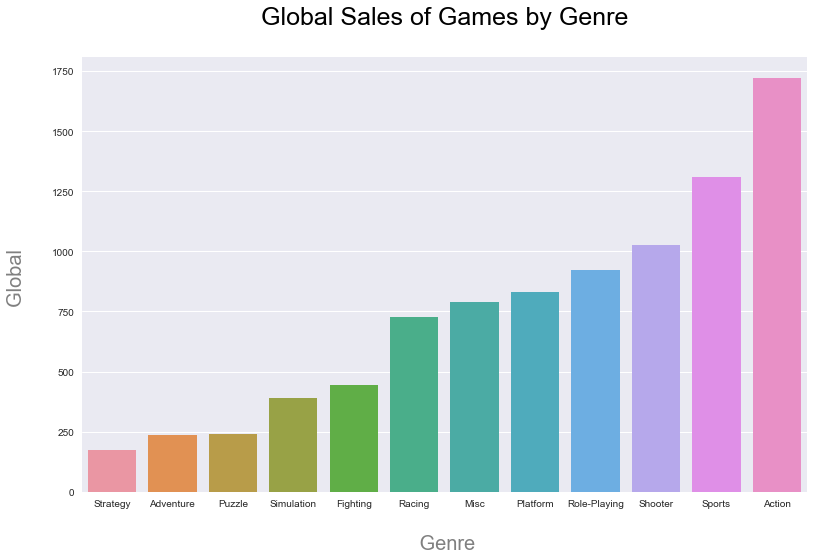

In [399]:
# Total global sales based on Genre
GS_genre = VG_df.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values('Global_Sales')
plt.subplots(figsize=(13,8))
x = GS_genre.index
y =GS_genre.Global_Sales
ax = sns.barplot(x, y)
ax.set_title('Global Sales of Games by Genre\n', color='black', size=25)
ax.set_xlabel('\n Genre', color='gray', size=20)
ax.set_ylabel('Global \n', color='gray', size=20),

Text(0, 0.5, 'NA Sales \n')

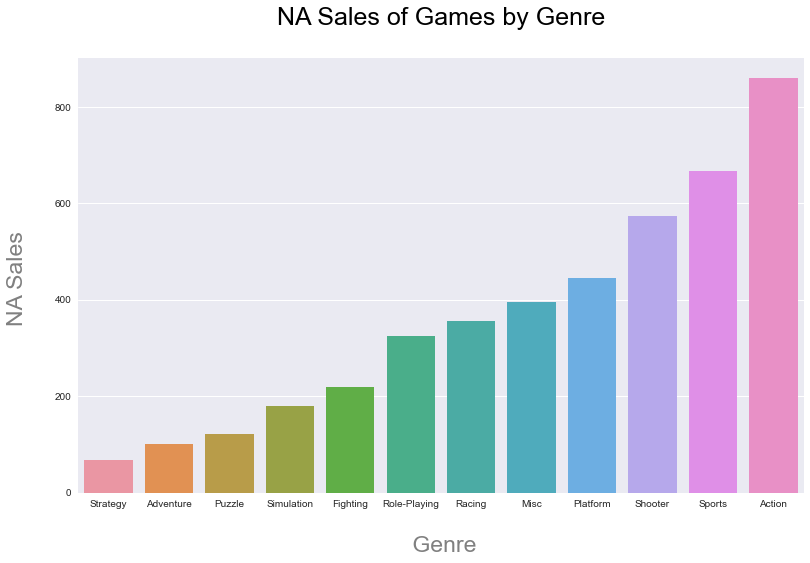

In [400]:
# Total NA sales based on Genre
GS_genre = VG_df.groupby('Genre').agg({'NA_Sales':np.sum}).sort_values('NA_Sales')
plt.subplots(figsize=(13,8))
ax = sns.barplot(x=GS_genre.index, y=GS_genre.NA_Sales)
ax.set_title('NA Sales of Games by Genre\n', color='black', size=25)
ax.set_xlabel('\n Genre', color='gray', size=23)
ax.set_ylabel('NA Sales \n', color='gray', size=23)

In [401]:
VG_df.Year.max()

'2020'

In [402]:
#cheking DataFram types
VG_df.dtypes 

#Chnage type of Year
VG_df['Year']=VG_df.Year.astype('int64')

VG_df.dtypes.copy

<bound method NDFrame.copy of Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object>

In [403]:
VG_df.loc[VG_df.Year > 2005,:]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...
16589,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.00,0.01
16590,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.00,0.01
16592,Plushees,DS,2008,Simulation,Destineer,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


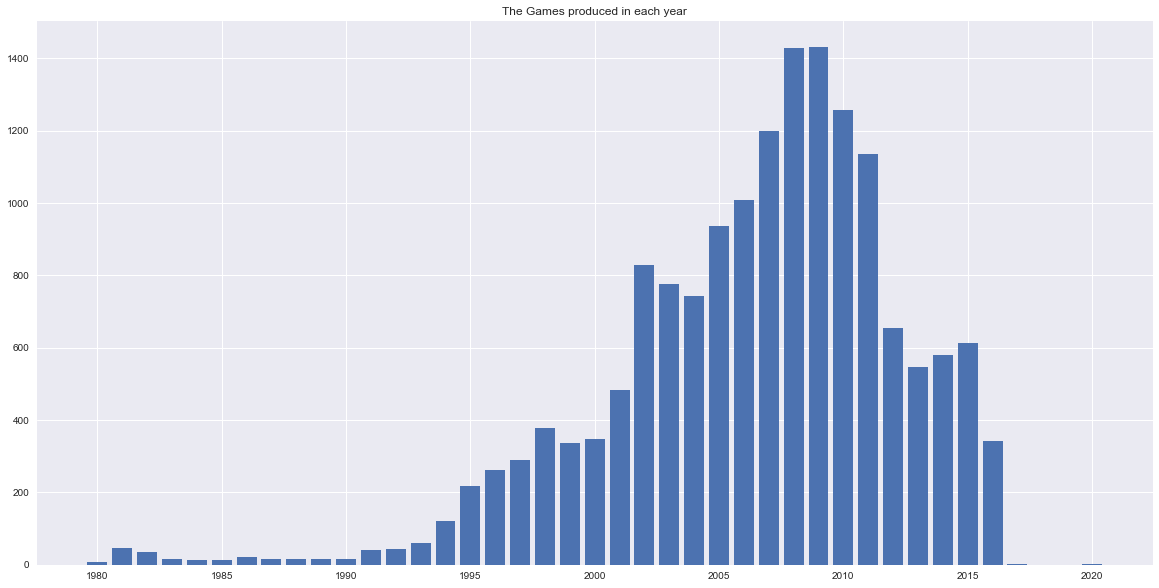

In [452]:
plt.figure(figsize=(20,10))
plt.title('The Games produced in each year')
plt.bar(VG_df["Year"].value_counts().index,VG_df["Year"].value_counts())
plt.show()

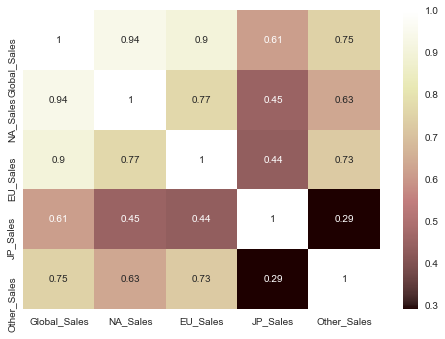

In [404]:
#Correlation of sales in different markets.
c=VG_df[['Global_Sales','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
c
sns.heatmap(c.corr(), annot=True ,cmap='pink')
plt.show()
#According to table, We see that Global,North American,European an Other countries markets (Except Japan),have strong correlated
#but on Japanese market is weakly correlated with other local markets.

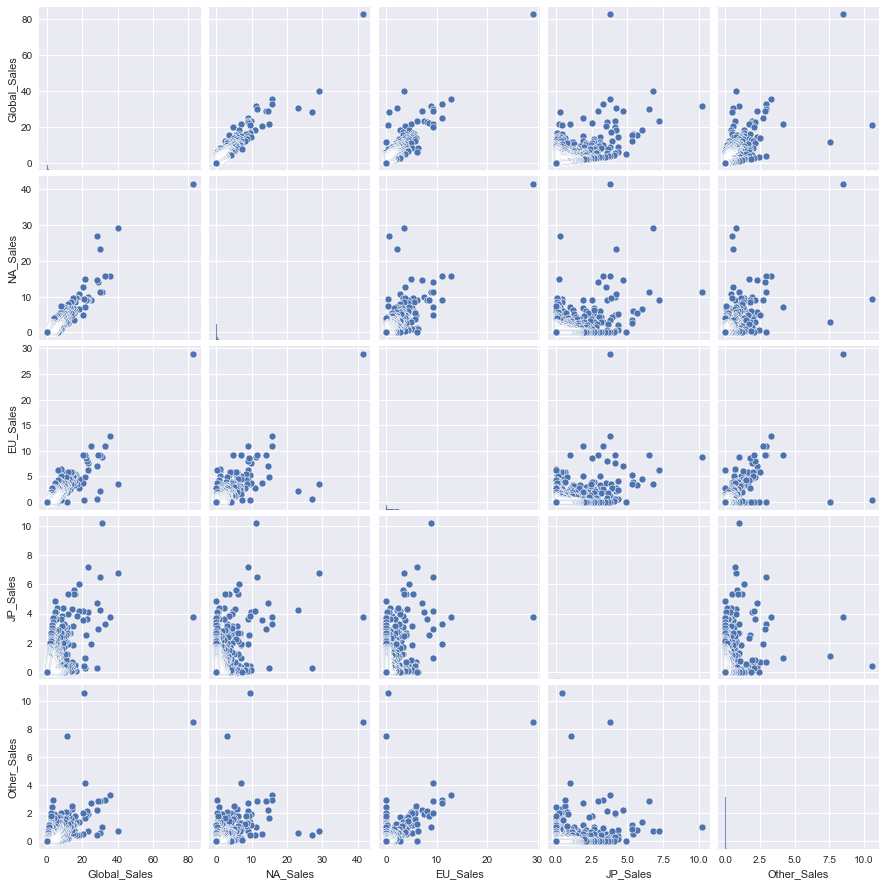

In [405]:
sns.pairplot(c);
#There is corelated i between Global,North America,Europe,Japan and Other Countries.

Builiding the model

In [453]:
x = VG_df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = VG_df[['Global_Sales']]

#Splitting into train and test sets for both parameters

x_train, x_test, YY_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)
# Building the model:

lr = LinearRegression()
# Fit the model on training data:

lr.fit(x_train, YY_train)

# Predict the testing data:
lr_predict = lr.predict(x_test)
lr_predict

array([[0.16074083],
       [0.01223865],
       [0.02172905],
       ...,
       [0.01198198],
       [0.87316378],
       [0.16184324]])

In [454]:
lr_predict

array([[0.16074083],
       [0.01223865],
       [0.02172905],
       ...,
       [0.01198198],
       [0.87316378],
       [0.16184324]])

In [455]:
YY_train

,Global_Sales
3896,0.51
15718,0.02
1258,1.50
7638,0.20
11690,0.08
...,...
13657,0.04
5474,0.33
870,1.96
16089,0.01


In [456]:
YY_train=pd.DataFrame(y_train).to_numpy()
YY_train.astype

<function ndarray.astype>

In [444]:
YY_train.astype

<function ndarray.astype>

In [446]:
#Comparison between Actual and Predicted value.

df1 = pd.DataFrame({'Actual': [YY_train* 100], 'Predicted': [lr_predict*100]})
df1.head()


,Actual,Predicted
0,"[[51.0], [2.0], [150.0], [20.0], [8.0], [25.0]...","[[16.074083063381046], [1.223865360632731], [2..."


In [457]:

# Show R_Squared on the training data 
R2=lr.score(x_train, y_train)
print('R^2 Score trining data:',R2 * 100,"%")

# Show R-squared value of the model on the predict data
r2=r2_score(y_test, lr_predict)
print('R^2 Score testing data:',r2 * 100,"%")

R^2 Score trining data: 99.92402282815371 %
R^2 Score testing data: 99.9633081668497 %


In [459]:
print("X_train shape: {}".format(x_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(x_test.shape))
print("Y_test shape: {}".format(y_test.shape))

X_train shape: (3257, 5)
Y_train shape: (3257, 1)
X_test shape: (13032, 5)
Y_test shape: (13032, 1)


In [412]:
# Compare the actual y values in the training set with the predicted values
y_actual_train = y_train
y_predicted_train = lr.predict(x_train)
y_predicted_train.shape


(3257, 1)

In [413]:
# Compare the actual y values in the test set with the predicted values
#y_actual_test = df_test['y']
#y_predicted_test = lr.predict(df_test[['x1','x2']])
#y_predicted_test.shape

Text(0, 0.5, 'Predicted')

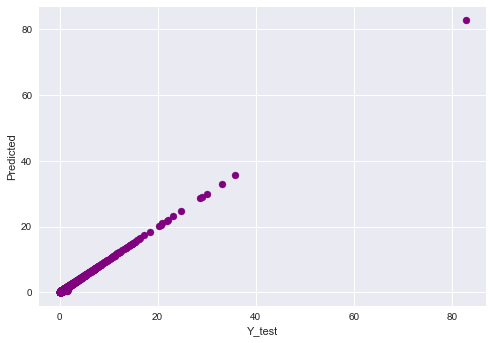

In [460]:


plt.scatter(y_test,lr_predict, color="purple")
plt.xlabel('Y_test')
plt.ylabel('Predicted')
#plt.plot(x_test,lr_predict, color="blue")

In [415]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x_train)
pcafeatures_train = pca.transform(x_train)
pcafeatures_train

array([[ 3.43856308e+00, -6.29883214e-03],
       [-3.56933360e+00, -2.15227463e-01],
       [ 6.42689945e+00, -4.45792015e-01],
       ...,
       [ 4.59103486e-01,  9.01368923e-01],
       [-3.56923638e+00, -2.16321689e-01],
       [-3.56397865e+00, -3.05485111e-02]])

AttributeError: 'DataFrame' object has no attribute 'target'